In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# processing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# model libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer
def replace_missing_value(df, number_features):

    imputer = SimpleImputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

In [2]:
#훈련데이터 import,  데이터 유형 확인 , Unknown값 Null로 변환
df=pd.read_csv('../0.data/bank_churner.csv',na_values = 'Unknown')


In [3]:
counts = df.is_churned.value_counts()
(counts[1] / (counts[0] + counts[1])) * 100
df.head(4).style.set_properties(**{"background-color": "#b2c4cc","color": "black", "border-color": "black", "font-size":"8pt", 'width': 200})

,Unnamed: 0,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,4,3,3,3544.000000,nan,1883.000000,0.831000,nan,111.000000,0.734000,0.469000
1,1,708083283,1,58,M,0,nan,Single,$40K - $60K,Blue,45,3,1,3,3421.000000,2517.000000,904.000000,0.992000,992.000000,21.000000,0.400000,nan
2,2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.000000,1771.000000,6487.000000,nan,1447.000000,23.000000,0.000000,0.214000
3,3,708085458,0,34,F,2,Uneducated,Single,Less than $40K,Blue,24,6,2,2,1438.300000,0.000000,1438.300000,0.827000,3940.000000,82.000000,0.952000,0.000000


/tmp/ipykernel_25562/3959799195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat = df.corr()


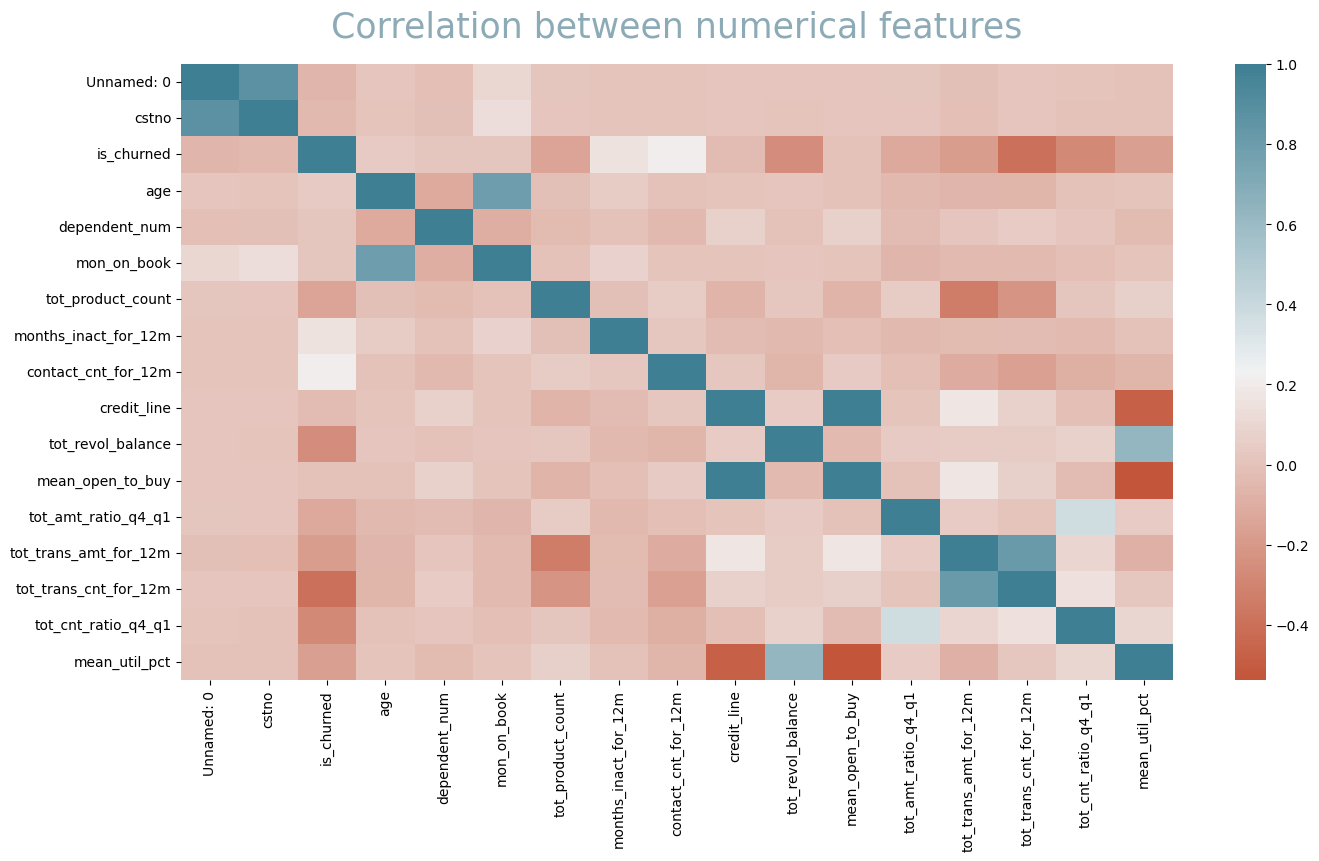

In [4]:
heat = df.corr()
plt.figure(figsize = [16,8])
plt.title("Correlation between numerical features", size = 25, pad = 20, color = '#8cabb6')
sns.heatmap(heat, cmap = sns.diverging_palette(20, 220, n = 200), annot = False)
plt.show()

In [5]:
# drop client id
df = df.drop('cstno', axis = 1)

catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['Float64']).columns

In [6]:
df.isnull().sum()

Unnamed: 0                  0
is_churned                  0
age                         0
sex                       808
dependent_num               0
education                1205
marital_stat              579
imcome_cat               2321
card_type                   0
mon_on_book                 0
tot_product_count           0
months_inact_for_12m        0
contact_cnt_for_12m         0
credit_line                 0
tot_revol_balance        1521
mean_open_to_buy            0
tot_amt_ratio_q4_q1      2435
tot_trans_amt_for_12m    1669
tot_trans_cnt_for_12m    3250
tot_cnt_ratio_q4_q1      1629
mean_util_pct            2526
dtype: int64

In [7]:
df = pd.get_dummies(df, columns = catcols)

# minmax scaling numeric features 
for col in df[floatcols]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])
    
for col in df[intcols]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])
    
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 36


In [8]:
X = df.drop('is_churned', axis = 1)
y = df['is_churned']

In [9]:
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 36


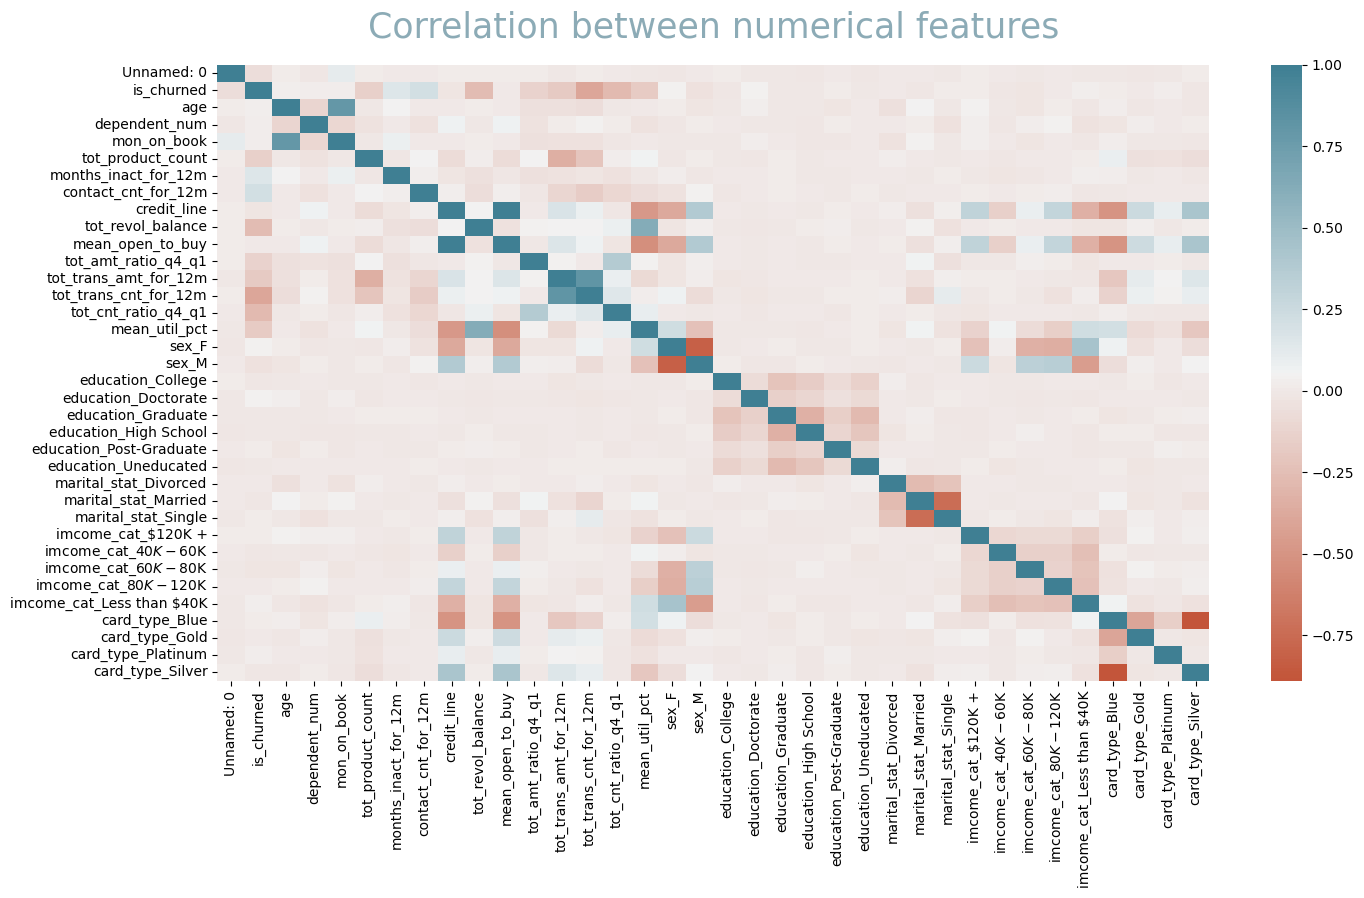

In [10]:
heat = df.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between numerical features", size = 25, pad = 20, color = '#8cabb6')
sns.heatmap(heat,cmap = sns.diverging_palette(20, 220, n = 200), annot=False)
plt.show()

In [11]:
corr = df.corr()
corr.sort_values(["is_churned"], ascending = False, inplace = True)
correlations = corr.is_churned
a = correlations[correlations > 0.1]
b = correlations[correlations < -0.1]
top_corr_features = a.append(b)
top_corr_features

/tmp/ipykernel_25562/3906863091.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_corr_features = a.append(b)


is_churned               1.000000
contact_cnt_for_12m      0.211327
months_inact_for_12m     0.156552
tot_amt_ratio_q4_q1     -0.126201
tot_product_count       -0.150889
mean_util_pct           -0.171248
tot_trans_amt_for_12m   -0.183235
tot_revol_balance       -0.259123
tot_cnt_ratio_q4_q1     -0.279982
tot_trans_cnt_for_12m   -0.391563
Name: is_churned, dtype: float64

In [12]:
# Code adapted from: https://www.kaggle.com/code/andreshg/churn-prediction-0-99-auc-h2o-sklearn-smote#4.-Feature-Selection

def plot_importances(model, model_name, features_to_plot, feature_names):
    #fit model and performances
    model.fit(X,y)
    importances = model.feature_importances_
    
    # sort and rank importances
    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    values = importances[indices][-features_to_plot:]
    
    # plot a graph
    y_ticks = np.arange(0, features_to_plot)
    fig, ax = plt.subplots()
    ax.barh(y_ticks, values, color = '#b2c4cc')
    ax.set_yticklabels(best_features)
    ax.set_yticks(y_ticks)
    ax.set_title("%s Feature Importances"%(model_name))
    fig.tight_layout()
    plt.show()
    
def best_features(model, features_to_plot, feature_names):
    # get list of best features 
    model.fit(X,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-features_to_plot:]
    return best_features

In [13]:
X = X.fillna(0)
X1 = X.dropna(0)
feature_names = list(X.columns)
feature_names_d = list(X1.columns)
from sklearn.metrics import mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

/tmp/ipykernel_25562/970540284.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  X1 = X.dropna(0)


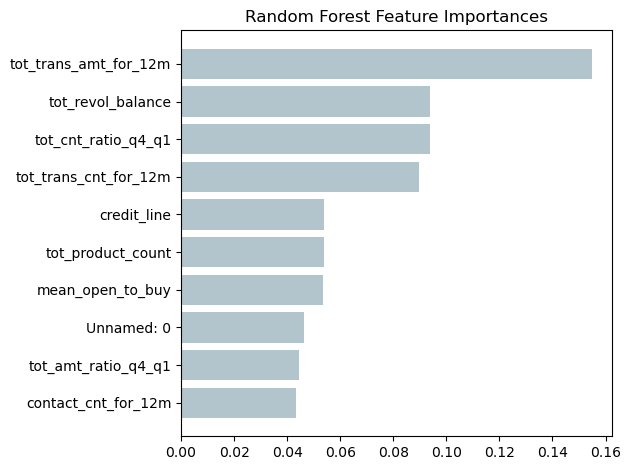

In [14]:
model1 = RandomForestClassifier(random_state = 1234)
plot_importances(model1, 'Random Forest', 10, feature_names)
#plot_importances(model1, 'Random Forest', 10, feature_names_d)

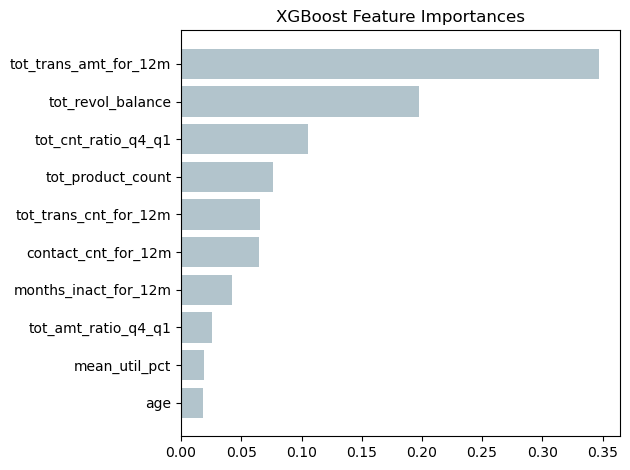

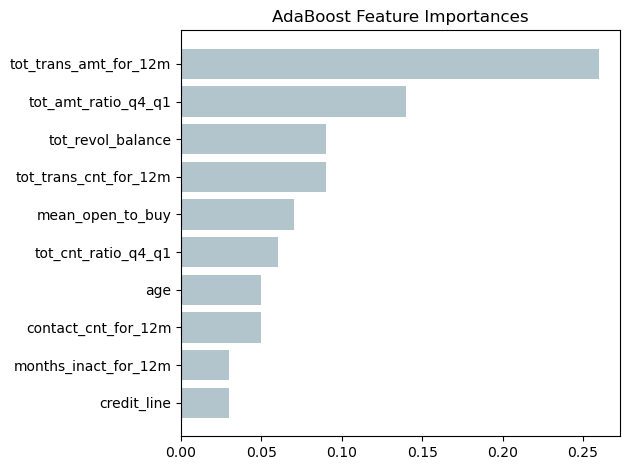

In [15]:
model2 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)
plot_importances(model2, 'XGBoost', 10, feature_names)
#plot_importances(model2, 'XGBoost', 10, feature_names_d)

model3 = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 0)
plot_importances(model3, 'AdaBoost', 10, feature_names)
#plot_importances(model3, 'AdaBoost', 10, feature_names_d)

In [16]:
f_selector = SelectKBest(f_classif, k = 10)
f_selector.fit_transform(X, y)
best_features

<function __main__.best_features(model, features_to_plot, feature_names)>

In [17]:
forest_best = list(best_features(model1, 10, feature_names))
XG_best = list(best_features(model2, 10, feature_names))
ada_best = list(best_features(model3, 10, feature_names))
top_corr_features
#f_selector_best = f_selector.get_feature_names_out()

is_churned               1.000000
contact_cnt_for_12m      0.211327
months_inact_for_12m     0.156552
tot_amt_ratio_q4_q1     -0.126201
tot_product_count       -0.150889
mean_util_pct           -0.171248
tot_trans_amt_for_12m   -0.183235
tot_revol_balance       -0.259123
tot_cnt_ratio_q4_q1     -0.279982
tot_trans_cnt_for_12m   -0.391563
Name: is_churned, dtype: float64

In [18]:
best_features_overall = forest_best + XG_best + ada_best + list(top_corr_features)

In [19]:
# create a dictionary with the number of times features appear 
from collections import Counter
count_best_features = dict(Counter(best_features_overall))

# list of the features without any repeatitions
features_no_repeats = list(dict.fromkeys(best_features_overall))


In [20]:
# get list of features with high counts in the dictionary
def get_features(threshold):
    # remove features below a certain number of appearances
    chosen_features = []
    for i in features_no_repeats:
        if count_best_features[i] > threshold:
            chosen_features.append(i)
    return chosen_features

In [21]:
chosen_features = get_features(2)
chosen_features

['contact_cnt_for_12m',
 'tot_amt_ratio_q4_q1',
 'tot_trans_cnt_for_12m',
 'tot_cnt_ratio_q4_q1',
 'tot_revol_balance',
 'tot_trans_amt_for_12m']

In [22]:
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def eval_model(model, model_name, X, y, threshold):
    # make X the chosen subset
    chosen_features = get_features(threshold)
    X = X[chosen_features]
    
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    # fit model
    model.fit(train_x,train_y)
    model.score(test_x, test_y)
    pred_test = model.predict(test_x)
    
    # get metrics
    f1 = metrics.f1_score(test_y, pred_test)
    test_acc = metrics.accuracy_score(test_y, pred_test)
    con = metrics.confusion_matrix(test_y, pred_test)
    auc = roc_auc_score(test_y, pred_test)
    # getROC
    clf = model.fit(test_x,test_y)
    score = clf.predict_proba(test_x)[:, 1]
    fpr, tpr, cut = roc_curve(test_y, score)
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    ax.plot(fpr, tpr, label='RF')
    ax.legend()
    plt.show()
    
    print(con,'%s model with %s threshold: %.4f F1-score and %.4f accuracy %.4f auc'%(model_name, threshold, f1, test_acc, auc))

In [23]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
model1.fit(train_x,train_y)
model1.score(test_x, test_y)
pred_test = model1.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
    
print(con,f1,test_acc)

[[1675   13]
 [ 159  179]] 0.6754716981132076 0.9151036525172754


In [24]:
### reduced dataset
chosen_features = get_features(2)
Xnew = X[chosen_features]


In [25]:
from sklearn.metrics import roc_auc_score


train_x, test_x, train_y, test_y = train_test_split(Xnew, y, test_size = 0.25, random_state = 42)
    
model1.fit(train_x,train_y)
model1.score(test_x, test_y)
pred_test = model1.predict(test_x)
    
f1 = metrics.f1_score(test_y, pred_test)
test_acc = metrics.accuracy_score(test_y, pred_test)
auc = roc_auc_score(test_y, pred_test)
con = metrics.confusion_matrix(test_y, pred_test)
    


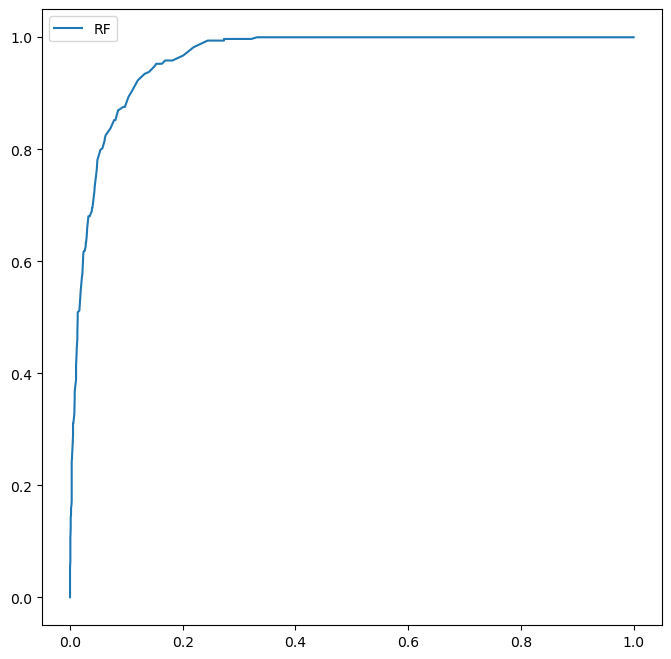

[[1663   25]
 [ 200  138]] KNN model with 2 threshold: 0.5509 F1-score and 0.8889 accuracy 0.6967 auc


In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model4 = BaggingClassifier(KNeighborsClassifier(n_neighbors = 7), max_samples = 0.8, max_features = 0.8)

eval_model(model4, 'KNN', X, y, 2)

# 데이터 전처리

In [5]:
# drop client id
df = df.drop('cstno', axis = 1)

catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['Float64']).columns

In [7]:
df = pd.get_dummies(df, columns = catcols)

# minmax scaling numeric features 
for col in df[floatcols]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])
    
for col in df[intcols]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])
    
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 36
